In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import array
import functools as ft # For merging multiple dataframes

In [3]:
market_shares = pd.read_csv("datasets/market_shares.csv")
market_shares = market_shares.drop(columns=['index'])
market_shares["year"] = pd.to_datetime(market_shares["year"], format='%Y')
market_shares = market_shares.sort_values(by=['name', 'year']).reset_index()
market_shares = market_shares.drop(columns=['index'])
market_shares = market_shares.rename(columns={"name": "distributor"})
market_shares

,distributor,slug,marketShare,marketPercentage,year
0,20TH CENTURY FOX,20th-century-fox,138433627,0.180984,2002-01-01
1,20TH CENTURY FOX,20th-century-fox,69125290,0.089792,2003-01-01
2,20TH CENTURY FOX,20th-century-fox,89021122,0.108544,2004-01-01
3,20TH CENTURY FOX,20th-century-fox,113565683,0.143192,2005-01-01
4,20TH CENTURY FOX,20th-century-fox,168165377,0.205581,2006-01-01
...,...,...,...,...,...
215,WARNER BROS,warner-bros,34177982,0.107847,2020-01-01
216,WARNER BROS,warner-bros,77791323,0.145038,2021-01-01
217,WARNER BROS,warner-bros,149238637,0.165174,2022-01-01
218,WARNER BROS,warner-bros,37609208,0.097239,2023-01-01


In [4]:
market_shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distributor       220 non-null    object        
 1   slug              220 non-null    object        
 2   marketShare       220 non-null    int64         
 3   marketPercentage  220 non-null    float64       
 4   year              220 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 8.7+ KB


In [5]:
shares_2011_now = market_shares.loc[market_shares['year'] > '2010-01-01']

In [6]:
total_market_shares = market_shares.groupby([market_shares.year.dt.year]).agg({'marketShare': 'sum'}).reset_index()
market_shares_2011_now = total_market_shares.loc[total_market_shares['year'] > 2010].reset_index().drop(columns=['index'])
market_shares_2011_now

,year,marketShare
0,2011,1025318135
1,2012,1106910979
2,2013,1047794981
3,2014,1039009939
4,2015,1188087698
5,2016,1200798683
6,2017,1285240927
7,2018,1253229045
8,2019,1194166406
9,2020,293067434


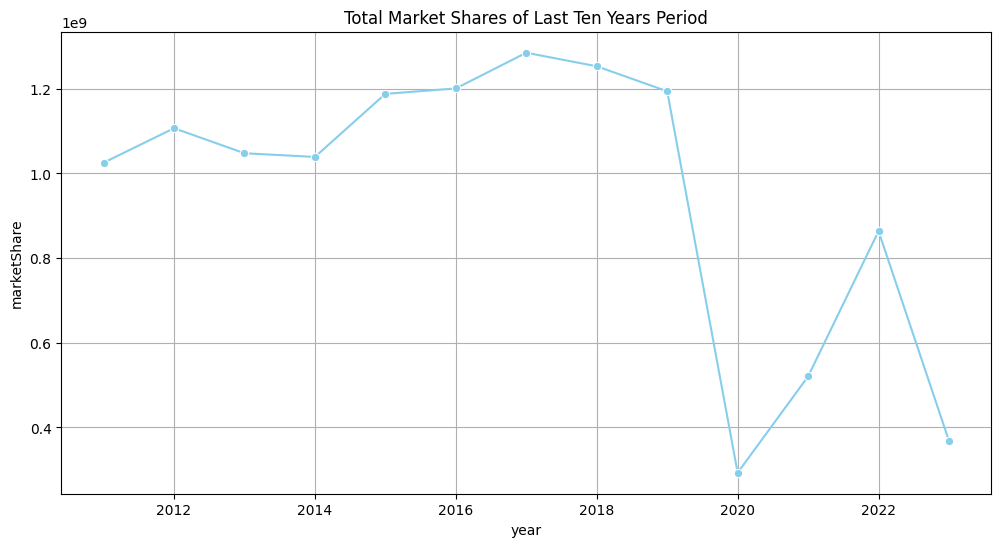

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data=market_shares_2011_now, x="year", y="marketShare", color='skyblue', marker="o").set(title='Total Market Shares of Last Ten Years Period')
plt.grid()
plt.show()

In [8]:
five_averages_shares = shares_2011_now.groupby('distributor').mean('marketShare').sort_values('marketShare', ascending=False).reset_index().head(5)
five_averages_shares = five_averages_shares[['distributor','marketShare']]
five_averages_shares

,distributor,marketShare
0,DISNEY,1.982647e+08
1,20TH CENTURY FOX,1.759200e+08
2,UNIVERSAL,1.687608e+08
3,WARNER BROS,1.436598e+08
4,SONY PICTURES,1.061552e+08


In [9]:
five_averages_distributors = five_averages_shares['distributor'].unique()
five_averages_distributors

array(['DISNEY', '20TH CENTURY FOX', 'UNIVERSAL', 'WARNER BROS',
       'SONY PICTURES'], dtype=object)

In [10]:
shares_of_five_biggest_avg = shares_2011_now.loc[market_shares['distributor'].isin(five_averages_distributors)]
shares_of_five_biggest_avg = shares_of_five_biggest_avg[['year','distributor','marketShare']].reset_index()
shares_of_five_biggest_avg = shares_of_five_biggest_avg.drop(columns=['index'])
shares_of_five_biggest_avg

,year,distributor,marketShare
0,2011-01-01,20TH CENTURY FOX,141459516
1,2012-01-01,20TH CENTURY FOX,186988392
2,2013-01-01,20TH CENTURY FOX,150636968
3,2014-01-01,20TH CENTURY FOX,243760318
4,2015-01-01,20TH CENTURY FOX,198069689
...,...,...,...
56,2019-01-01,WARNER BROS,157032119
57,2020-01-01,WARNER BROS,34177982
58,2021-01-01,WARNER BROS,77791323
59,2022-01-01,WARNER BROS,149238637


In [11]:
pivot_distributors_columns = np.array(five_averages_distributors)
pivot_columns = np.append (['year'], pivot_distributors_columns)

In [12]:
pivot_five_averages_shares = five_averages_shares.pivot_table(columns='distributor', values='marketShare').reset_index().drop(columns=['index'])
pivot_five_averages_shares[pivot_distributors_columns]

distributor,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,1.982647e+08,1.759200e+08,1.687608e+08,1.436598e+08,1.061552e+08


In [13]:
pivot_five_avg_biggest = shares_of_five_biggest_avg.pivot_table('marketShare', ['year'], 'distributor').reset_index()
pivot_five_avg_biggest = pivot_five_avg_biggest[pivot_columns]
pivot_five_avg_biggest = pivot_five_avg_biggest.fillna(0)
pivot_five_avg_biggest

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2011-01-01,104250309.0,141459516.0,130917732.0,195042654.0,72274376.0
1,2012-01-01,118874699.0,186988392.0,123052586.0,151634157.0,213749570.0
2,2013-01-01,172384710.0,150636968.0,171966281.0,185869157.0,98578630.0
3,2014-01-01,105781643.0,243760318.0,130700828.0,164881399.0,65178945.0
4,2015-01-01,237296387.0,198069689.0,276081269.0,109516879.0,148739507.0
5,2016-01-01,292585179.0,202322517.0,179084340.0,192952908.0,75651210.0
6,2017-01-01,287090647.0,200557409.0,207952714.0,222861778.0,137070643.0
7,2018-01-01,306978753.0,190414746.0,260728595.0,188968791.0,135781231.0
8,2019-01-01,484345454.0,69070223.0,179915306.0,157032119.0,111828684.0
9,2020-01-01,52794877.0,0.0,38157581.0,34177982.0,52571256.0


In [14]:
pivot_five_avg_biggest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              13 non-null     datetime64[ns]
 1   DISNEY            13 non-null     float64       
 2   20TH CENTURY FOX  13 non-null     float64       
 3   UNIVERSAL         13 non-null     float64       
 4   WARNER BROS       13 non-null     float64       
 5   SONY PICTURES     13 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 756.0 bytes


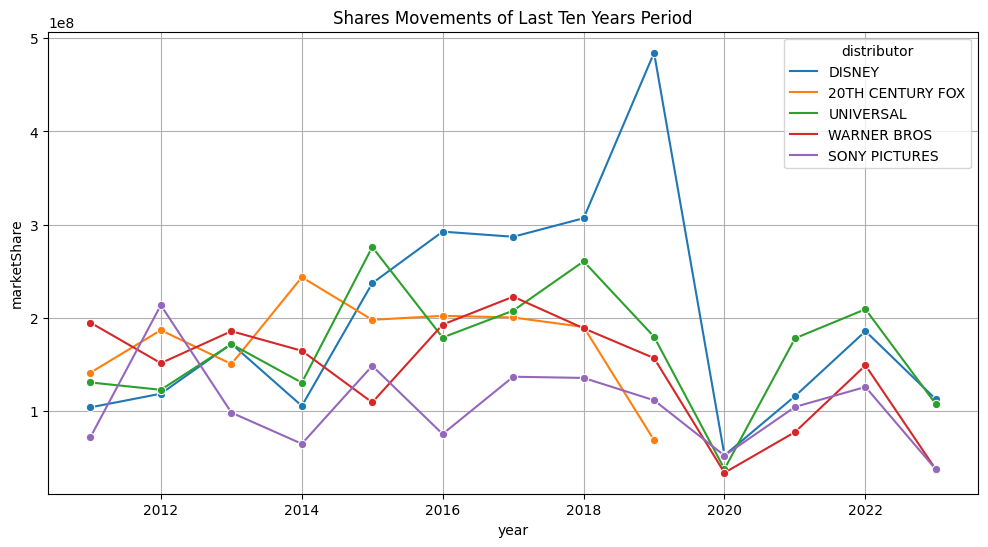

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=shares_of_five_biggest_avg, x="year", y="marketShare", color='skyblue', hue="distributor", hue_order=five_averages_distributors, marker="o").set(title='Shares Movements of Last Ten Years Period')
plt.grid()
plt.show()

In [16]:
films = pd.read_csv("datasets/archive_export.csv")
films["date"] = pd.to_datetime(films["date"], format='%Y%m%d')
films

,date,rank,film,country,weekend_gross,distributor,weeks_on_release,number_of_cinemas,total_gross,week_gross
0,2001-09-09,1,MOULIN ROUGE,NaN,2403378.0,20TH CENTURY FOX,1,284,2403378,2403378.0
1,2001-09-09,2,SCARY MOVIE 2,NaN,1553796.0,BVI,1,407,1553796,1553796.0
2,2001-09-09,3,A KNIGHT'S TALE,NaN,1000190.0,COL/TRISTAR,2,378,3555312,1000190.0
3,2001-09-09,4,PLANET OF THE APES,NaN,782750.0,20TH CENTURY FOX,4,436,15348851,782750.0
4,2001-09-09,5,CATS AND DOGS,NaN,495615.0,WARNER BROS,6,420,20389160,495615.0
...,...,...,...,...,...,...,...,...,...,...
39121,2023-04-16,99,ANYTHING GOES - THE MUSICAL (THEATRE),United Kingdom,560.0,TRAFALGAR,73,1,948384,1285.0
39122,2023-04-16,100,MADANOLSAVAM (IRELAND),India,524.0,2G ENTERTAINMENTS LTD,1,5,524,524.0
39123,2023-04-16,101,FUNTASTIC TARA,India,344.0,BLUE SAPPHIRE,1,8,344,344.0
39124,2023-04-16,102,SOPPANA SUNDARI (IRELAND),India,296.0,2G ENTERTAINMENTS LTD,1,4,296,296.0


In [17]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39126 entries, 0 to 39125
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               39126 non-null  datetime64[ns]
 1   rank               39126 non-null  int64         
 2   film               39126 non-null  object        
 3   country            31846 non-null  object        
 4   weekend_gross      39126 non-null  float64       
 5   distributor        39126 non-null  object        
 6   weeks_on_release   39126 non-null  int64         
 7   number_of_cinemas  39126 non-null  int64         
 8   total_gross        39126 non-null  int64         
 9   week_gross         39126 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.0+ MB


In [18]:
# Looking for the film title showing in the following year
film_first_year_launch = films.loc[films['distributor'].isin(five_averages_distributors)]
film_first_year_launch = film_first_year_launch.groupby([film_first_year_launch.date.dt.year, film_first_year_launch.distributor, film_first_year_launch.film]).agg(total_gross= ('total_gross' , 'sum')).reset_index()
film_first_year_launch = film_first_year_launch.rename(columns={"date": "year"})
film_first_year_launch = film_first_year_launch.groupby([film_first_year_launch.film, film_first_year_launch.distributor]).agg(first_launch_year= ('year' , 'min'))
film_first_year_launch = film_first_year_launch.sort_values(['first_launch_year','distributor','film'], ascending=True).reset_index()
film_first_year_launch

,film,distributor,first_launch_year
0,BANDITS,20TH CENTURY FOX,2001
1,DR. DOLITTLE 2,20TH CENTURY FOX,2001
2,KISS OF THE DRAGON,20TH CENTURY FOX,2001
3,LEGALLY BLONDE,20TH CENTURY FOX,2001
4,MOULIN ROUGE,20TH CENTURY FOX,2001
...,...,...,...
1996,MAGIC MIKE'S LAST DANCE,WARNER BROS,2023
1997,MUMMIES,WARNER BROS,2023
1998,SHAZAM! FURY OF THE GODS,WARNER BROS,2023
1999,SUPERMAN (45TH ANNIVERSARY),WARNER BROS,2023


In [19]:
films_five_highest_share = films.loc[films['distributor'].isin(five_averages_distributors)]
films_five_highest_share = films_five_highest_share.groupby([films_five_highest_share.date.dt.year, films_five_highest_share.distributor, films_five_highest_share.film]).agg(total_gross= ('total_gross' , 'sum')).reset_index()
films_five_highest_share = films_five_highest_share.rename(columns={"date": "year"})
films_five_highest_share = films_five_highest_share.loc[films_five_highest_share['year'] > 2010].reset_index().drop(columns=['index'])
films_five_highest_share

,year,distributor,film,total_gross
0,2011,20TH CENTURY FOX,ALVIN AND THE CHIPMUNKS: CHIPWRECKED,8014318
1,2011,20TH CENTURY FOX,ANOTHER EARTH,90950
2,2011,20TH CENTURY FOX,BIG MOMMA'S LIKE FATHER LIKE SON,4080907
3,2011,20TH CENTURY FOX,"BIG MOMMAS: LIKE FATHER, LIKE SON",11013077
4,2011,20TH CENTURY FOX,BLACK SWAN,78708111
...,...,...,...,...
1597,2023,WARNER BROS,SHAZAM! FURY OF THE GODS,22709983
1598,2023,WARNER BROS,SUPERMAN (45TH ANNIVERSARY),78429
1599,2023,WARNER BROS,TENET,17475441
1600,2023,WARNER BROS,THE LOST KING,1555668


In [20]:
films_five_highest_share.groupby(films_five_highest_share.year).agg(total_gross= ('total_gross' , 'sum')).reset_index()

,year,total_gross
0,2011,5400782749
1,2012,7578645789
2,2013,8185770530
3,2014,6685935689
4,2015,8295033158
5,2016,11902770413
6,2017,11894805721
7,2018,13787853218
8,2019,13748723216
9,2020,16993102171


In [21]:
film_showing_status = pd.merge(films_five_highest_share, film_first_year_launch, on=('film','distributor'), how='left').reset_index().drop(columns=['index'])
def add_column(row):
    if row['year'] ==  row['first_launch_year'] or (row['year'] - row['first_launch_year']) == 1:
        return 'First Showing'
    else:
        return 'Re-Showing'
film_showing_status['status'] = film_showing_status.apply(add_column, axis=1)
film_showing_status

,year,distributor,film,total_gross,first_launch_year,status
0,2011,20TH CENTURY FOX,ALVIN AND THE CHIPMUNKS: CHIPWRECKED,8014318,2011,First Showing
1,2011,20TH CENTURY FOX,ANOTHER EARTH,90950,2011,First Showing
2,2011,20TH CENTURY FOX,BIG MOMMA'S LIKE FATHER LIKE SON,4080907,2011,First Showing
3,2011,20TH CENTURY FOX,"BIG MOMMAS: LIKE FATHER, LIKE SON",11013077,2011,First Showing
4,2011,20TH CENTURY FOX,BLACK SWAN,78708111,2011,First Showing
...,...,...,...,...,...,...
1597,2023,WARNER BROS,SHAZAM! FURY OF THE GODS,22709983,2023,First Showing
1598,2023,WARNER BROS,SUPERMAN (45TH ANNIVERSARY),78429,2023,First Showing
1599,2023,WARNER BROS,TENET,17475441,2020,Re-Showing
1600,2023,WARNER BROS,THE LOST KING,1555668,2022,First Showing


In [60]:
overall_film_showing_status = film_showing_status.loc[(film_showing_status['year'] - film_showing_status['first_launch_year']) != 1].reset_index().drop(columns=['index'])
overall_film_showing_status

,year,distributor,film,total_gross,first_launch_year,status
0,2020,20TH CENTURY FOX,ALIEN (RE: 2014),162557,2016,Re-Showing
1,2020,20TH CENTURY FOX,ALIENS (RE: 2014),345534,2014,Re-Showing
2,2020,20TH CENTURY FOX,BOHEMIAN RHAPSODY,827781550,2018,Re-Showing
3,2020,20TH CENTURY FOX,FANTASTIC MR. FOX,18503641,2009,Re-Showing
4,2020,20TH CENTURY FOX,FIGHT CLUB,5670538,2020,First Showing
...,...,...,...,...,...,...
385,2023,WARNER BROS,POKEMON DETECTIVE PIKACHU,13842524,2019,Re-Showing
386,2023,WARNER BROS,SHAZAM! FURY OF THE GODS,22709983,2023,First Showing
387,2023,WARNER BROS,SUPERMAN (45TH ANNIVERSARY),78429,2023,First Showing
388,2023,WARNER BROS,TENET,17475441,2020,Re-Showing


In [67]:
pandemic_film_showing_status = overall_film_showing_status.loc[overall_film_showing_status['year'] > 2019].reset_index().drop(columns=['index'])
pandemic_film_showing_status = pandemic_film_showing_status.groupby([pandemic_film_showing_status['distributor'], pandemic_film_showing_status['year'], pandemic_film_showing_status['status']]).agg(film_count = ('status','count')).reset_index()
pandemic_film_showing_status

,distributor,year,status,film_count
0,20TH CENTURY FOX,2020,First Showing,5
1,20TH CENTURY FOX,2020,Re-Showing,7
2,20TH CENTURY FOX,2021,Re-Showing,4
3,20TH CENTURY FOX,2022,First Showing,1
4,20TH CENTURY FOX,2022,Re-Showing,2
5,20TH CENTURY FOX,2023,Re-Showing,2
6,DISNEY,2020,First Showing,14
7,DISNEY,2020,Re-Showing,8
8,DISNEY,2021,First Showing,17
9,DISNEY,2021,Re-Showing,5


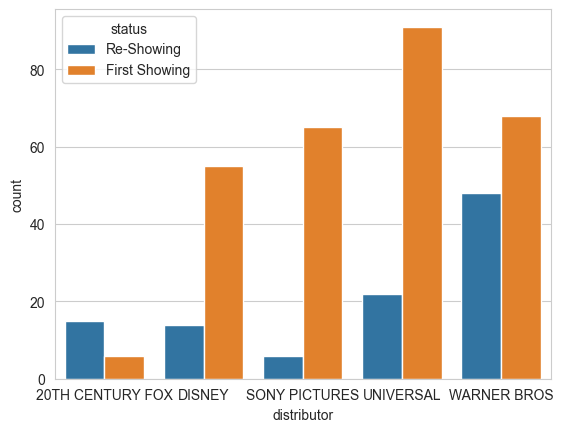

In [61]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

sns.countplot(data=pandemic_film_showing_status, x="distributor", hue="status")
plt.show()

In [24]:
first_showing_film = film_showing_status.loc[(film_showing_status['year'] - film_showing_status['first_launch_year']) == 0].reset_index().drop(columns=['index'])
first_showing_film = first_showing_film[['year','film','distributor']]
first_showing_film

,year,film,distributor
0,2011,ALVIN AND THE CHIPMUNKS: CHIPWRECKED,20TH CENTURY FOX
1,2011,ANOTHER EARTH,20TH CENTURY FOX
2,2011,BIG MOMMA'S LIKE FATHER LIKE SON,20TH CENTURY FOX
3,2011,"BIG MOMMAS: LIKE FATHER, LIKE SON",20TH CENTURY FOX
4,2011,BLACK SWAN,20TH CENTURY FOX
...,...,...,...
1318,2023,MAGIC MIKE'S LAST DANCE,WARNER BROS
1319,2023,MUMMIES,WARNER BROS
1320,2023,SHAZAM! FURY OF THE GODS,WARNER BROS
1321,2023,SUPERMAN (45TH ANNIVERSARY),WARNER BROS


In [25]:
count_first_showing_film = first_showing_film.groupby([first_showing_film.distributor, first_showing_film.year]).agg(first_showing_count = ('film' , 'count')).reset_index()
count_first_showing_film

,distributor,year,first_showing_count
0,20TH CENTURY FOX,2011,30
1,20TH CENTURY FOX,2012,32
2,20TH CENTURY FOX,2013,27
3,20TH CENTURY FOX,2014,30
4,20TH CENTURY FOX,2015,37
...,...,...,...
58,WARNER BROS,2019,29
59,WARNER BROS,2020,19
60,WARNER BROS,2021,22
61,WARNER BROS,2022,19


In [26]:
total_first_showing_film_per_distri = count_first_showing_film.groupby([count_first_showing_film.distributor]).agg(first_showing_count = ('first_showing_count' , 'sum')).reset_index()
total_first_showing_film_per_distri

,distributor,first_showing_count
0,20TH CENTURY FOX,267
1,DISNEY,166
2,SONY PICTURES,256
3,UNIVERSAL,336
4,WARNER BROS,298


In [27]:
total_new_title = count_first_showing_film.groupby(count_first_showing_film.year).agg(total_new_title = ('first_showing_count' , 'sum')).reset_index()

In [28]:
pivot_count_first_showing_film = count_first_showing_film.pivot_table('first_showing_count', ['year'], 'distributor').reset_index()
pivot_count_first_showing_film = pivot_count_first_showing_film[pivot_columns]
pivot_count_first_showing_film = pivot_count_first_showing_film.fillna(0)
pivot_count_first_showing_film

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2011,14.0,30.0,29.0,24.0,21.0
1,2012,14.0,32.0,29.0,22.0,23.0
2,2013,15.0,27.0,26.0,21.0,18.0
3,2014,12.0,30.0,25.0,29.0,20.0
4,2015,11.0,37.0,25.0,25.0,17.0
5,2016,11.0,28.0,25.0,30.0,26.0
6,2017,6.0,33.0,25.0,24.0,24.0
7,2018,12.0,22.0,29.0,26.0,22.0
8,2019,16.0,22.0,32.0,29.0,20.0
9,2020,14.0,5.0,19.0,19.0,14.0


In [29]:
re_showing_film = film_showing_status.loc[film_showing_status['status'] == 'Re-Showing'].reset_index().drop(columns=['index'])
re_showing_film = re_showing_film[['year','film','distributor']]
re_showing_film

,year,film,distributor
0,2013,ARTHUR CHRISTMAS,SONY PICTURES
1,2014,ARTHUR CHRISTMAS,SONY PICTURES
2,2015,FANTASTIC FOUR,20TH CENTURY FOX
3,2016,MAMMA MIA!,UNIVERSAL
4,2016,GRAVITY,WARNER BROS
...,...,...,...
113,2023,NOTTING HILL (RE: 2020),UNIVERSAL
114,2023,2001: A SPACE ODYSSEY (RE: 2018),WARNER BROS
115,2023,DUNKIRK,WARNER BROS
116,2023,POKEMON DETECTIVE PIKACHU,WARNER BROS


In [30]:
count_films_of_five_2011_now = films_five_highest_share.groupby([films_five_highest_share.year, films_five_highest_share.distributor]).agg(film_count= ('film' , 'count')).reset_index()
count_films_of_five_2011_now

,year,distributor,film_count
0,2011,20TH CENTURY FOX,33
1,2011,DISNEY,15
2,2011,SONY PICTURES,22
3,2011,UNIVERSAL,29
4,2011,WARNER BROS,25
...,...,...,...
60,2023,20TH CENTURY FOX,2
61,2023,DISNEY,10
62,2023,SONY PICTURES,11
63,2023,UNIVERSAL,20


In [31]:
pivot_count_films_of_five_2011_now = count_films_of_five_2011_now.pivot_table('film_count', ['year'], 'distributor').reset_index()
pivot_count_films_of_five_2011_now = pivot_count_films_of_five_2011_now[pivot_columns]
pivot_count_films_of_five_2011_now

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2011,15,33,29,25,22
1,2012,14,33,31,25,24
2,2013,17,30,27,23,20
3,2014,15,37,27,31,22
4,2015,13,43,28,27,19
5,2016,13,32,29,34,29
6,2017,10,36,27,27,26
7,2018,16,25,32,29,23
8,2019,20,25,37,34,22
9,2020,29,13,34,46,18


In [32]:
count_re_showing_film = re_showing_film.groupby([re_showing_film.distributor, re_showing_film.year]).agg(re_showing_count = ('film' , 'count')).reset_index()
count_re_showing_film

,distributor,year,re_showing_count
0,20TH CENTURY FOX,2015,1
1,20TH CENTURY FOX,2020,7
2,20TH CENTURY FOX,2021,4
3,20TH CENTURY FOX,2022,2
4,20TH CENTURY FOX,2023,2
5,DISNEY,2017,1
6,DISNEY,2018,3
7,DISNEY,2019,1
8,DISNEY,2020,8
9,DISNEY,2021,5


In [33]:
total_count_re_showing_film_per_distri = count_re_showing_film.groupby([count_re_showing_film.distributor]).agg(re_showing_count = ('re_showing_count' , 'sum')).reset_index()
total_count_re_showing_film_per_distri

,distributor,re_showing_count
0,20TH CENTURY FOX,16
1,DISNEY,19
2,SONY PICTURES,8
3,UNIVERSAL,25
4,WARNER BROS,50


In [34]:
pivot_count_re_showing_film = count_re_showing_film.pivot_table('re_showing_count', ['year'], 'distributor').reset_index()
pivot_count_re_showing_film = pivot_count_re_showing_film[pivot_columns]
pivot_count_re_showing_film

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2013,NaN,NaN,NaN,NaN,1.0
1,2014,NaN,NaN,NaN,NaN,1.0
2,2015,NaN,1.0,NaN,NaN,NaN
3,2016,NaN,NaN,1.0,2.0,NaN
4,2017,1.0,NaN,NaN,NaN,NaN
5,2018,3.0,NaN,1.0,NaN,NaN
6,2019,1.0,NaN,1.0,NaN,NaN
7,2020,8.0,7.0,10.0,21.0,1.0
8,2021,5.0,4.0,4.0,12.0,3.0
9,2022,1.0,2.0,5.0,11.0,2.0


In [35]:
highest_gross_of_five_highest_share = films_five_highest_share.groupby([films_five_highest_share.year, films_five_highest_share.distributor]).agg(highest_gross= ('total_gross' , 'max')).reset_index()
highest_gross_2011_now = highest_gross_of_five_highest_share.loc[highest_gross_of_five_highest_share['year'] > 2010].reset_index()
highest_gross_2011_now = highest_gross_2011_now.drop(columns=['index'])
highest_gross_2011_now["year"] = pd.to_datetime(highest_gross_2011_now["year"], format='%Y')
highest_gross_2011_now

,year,distributor,highest_gross
0,2011-01-01,20TH CENTURY FOX,165094647
1,2011-01-01,DISNEY,412583020
2,2011-01-01,SONY PICTURES,148431228
3,2011-01-01,UNIVERSAL,206367975
4,2011-01-01,WARNER BROS,1120178741
...,...,...,...
60,2023-01-01,20TH CENTURY FOX,9265226
61,2023-01-01,DISNEY,757691062
62,2023-01-01,SONY PICTURES,426698579
63,2023-01-01,UNIVERSAL,221707731


In [36]:
pivot_highest_gross_2011_now = highest_gross_2011_now.pivot_table('highest_gross', ['year'], 'distributor').reset_index()
pivot_highest_gross_2011_now = pivot_highest_gross_2011_now[pivot_columns]
pivot_highest_gross_2011_now

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2011-01-01,412583020,165094647,206367975,1120178741,148431228
1,2012-01-01,430412032,522923515,288937718,1074354534,805583944
2,2013-01-01,306392624,337636568,913413870,298039941,1950330400
3,2014-01-01,566914563,233579962,155120317,658799883,114403339
4,2015-01-01,756715062,377217588,623065297,157182403,724460641
5,2016-01-01,2887977365,252301875,613019231,218181542,1044715203
6,2017-01-01,1962623511,404172671,664818479,1120263755,193498044
7,2018-01-01,1184950464,685971024,1408727147,794038815,1171320009
8,2019-01-01,1687797108,1236282749,392751850,463968227,528734534
9,2020-01-01,835813700,827781550,412937672,1241646570,302767898


In [37]:
highest_distributor_gross = highest_gross_2011_now.groupby([highest_gross_2011_now.distributor]).agg(max_highest_gross= ('highest_gross' , 'max')).sort_values('max_highest_gross', ascending=False).reset_index()
highest_distributor_gross

,distributor,max_highest_gross
0,DISNEY,2887977365
1,SONY PICTURES,1950330400
2,UNIVERSAL,1408727147
3,WARNER BROS,1241646570
4,20TH CENTURY FOX,1236282749


In [38]:
five_highest_gross_distributors = highest_distributor_gross['distributor'].unique()
five_highest_gross_distributors

array(['DISNEY', 'SONY PICTURES', 'UNIVERSAL', 'WARNER BROS',
       '20TH CENTURY FOX'], dtype=object)

In [39]:
five_max_highest_gross = highest_distributor_gross['max_highest_gross'].unique()
five_max_highest_gross

array([2887977365, 1950330400, 1408727147, 1241646570, 1236282749],
      dtype=int64)

In [40]:
highest_gross_film_title = films_five_highest_share.loc[films_five_highest_share['total_gross'].isin(five_max_highest_gross)].reset_index().drop(columns=['index'])[['year','film','distributor','total_gross']]
highest_gross_film_title.sort_values('total_gross', ascending=False)

,year,film,distributor,total_gross
1,2016,STAR WARS: THE FORCE AWAKENS,DISNEY,2887977365
0,2013,SKYFALL,SONY PICTURES,1950330400
2,2018,MAMMA MIA: HERE WE GO AGAIN!,UNIVERSAL,1408727147
4,2020,HARRY POTTER AND THE DEATHLY HALLOWS: PART 2,WARNER BROS,1241646570
3,2019,BOHEMIAN RHAPSODY,20TH CENTURY FOX,1236282749


In [41]:
highest_gross_value = highest_gross_2011_now['highest_gross'].unique()

In [42]:
films_list_2011_now = films_five_highest_share.loc[films_five_highest_share['total_gross'].isin(highest_gross_value)].reset_index().drop(columns=['index'])[['year','film','distributor','total_gross']]
films_list_2011_now["year"] = pd.to_datetime(films_list_2011_now["year"], format='%Y')

In [43]:
pivot_films_2011_now = films_list_2011_now.pivot_table('film', ['year'], 'distributor', aggfunc=lambda x: ' '.join(x)).reset_index()
pivot_films_2011_now = pivot_films_2011_now[pivot_columns]
pivot_films_2011_now

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2011-01-01,PIRATES OF THE CARIBBEAN: ON STRANGER TIDES,GULLIVER'S TRAVELS,JOHNNY ENGLISH REBORN,HARRY POTTER AND THE DEATHLY HALLOWS: PART 2,THE SMURFS
1,2012-01-01,MARVEL AVENGERS ASSEMBLE,THE BEST EXOTIC MARIGOLD HOTEL,JOHNNY ENGLISH REBORN,THE DARK KNIGHT RISES,SKYFALL
2,2013-01-01,WRECK-IT RALPH,THE CROODS,LES MISERABLES,THE HOBBIT: AN UNEXPECTED JOURNEY,SKYFALL
3,2014-01-01,FROZEN,DAWN OF THE PLANET OF THE APES,MRS. BROWN'S BOYS D'MOVIE,GRAVITY,THE AMAZING SPIDER-MAN 2
4,2015-01-01,THE AVENGERS: AGE OF ULTRON,KINGSMAN: THE SECRET SERVICE,MINIONS,THE HOBBIT: THE BATTLE OF THE FIVE ARMIES,SPECTRE
5,2016-01-01,STAR WARS: THE FORCE AWAKENS,DEADPOOL,BRIDGET JONES'S BABY,FANTASTIC BEASTS AND WHERE TO FIND THEM,SPECTRE
6,2017-01-01,BEAUTY AND THE BEAST,THE BOSS BABY,DESPICABLE ME 3,DUNKIRK,BABY DRIVER
7,2018-01-01,AVENGERS: INFINITY WAR,THE GREATEST SHOWMAN,MAMMA MIA: HERE WE GO AGAIN!,DUNKIRK,PETER RABBIT
8,2019-01-01,AVENGERS: ENDGAME,BOHEMIAN RHAPSODY,DOWNTON ABBEY,JOKER,SPIDER-MAN: FAR FROM HOME
9,2020-01-01,THE LION KING,BOHEMIAN RHAPSODY,MAMMA MIA!,HARRY POTTER AND THE DEATHLY HALLOWS: PART 2,JUMANJI: THE NEXT LEVEL


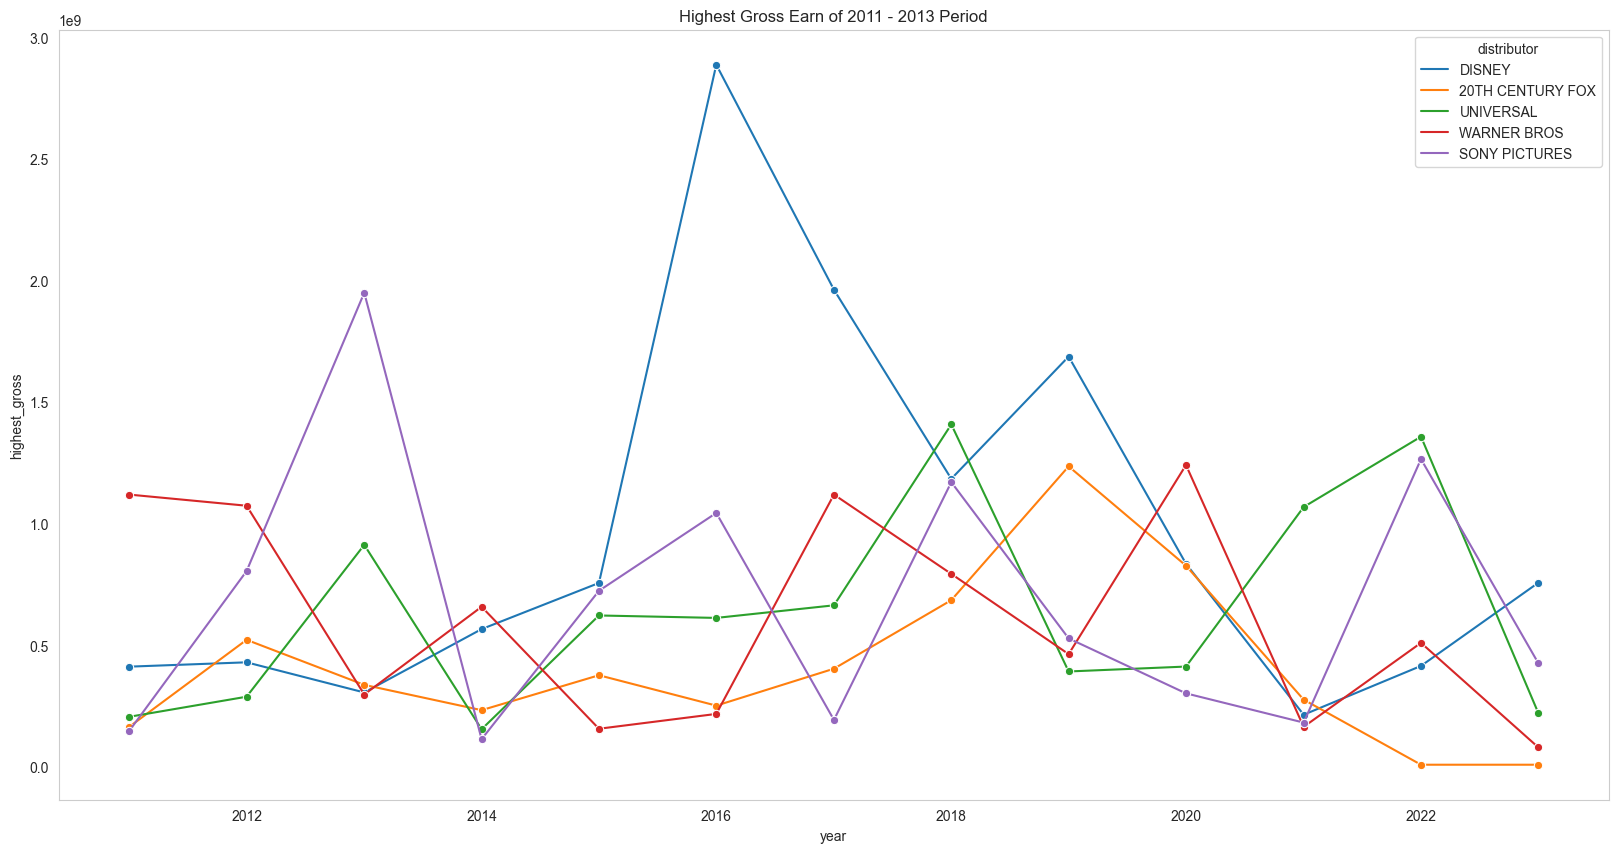

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(data=highest_gross_2011_now, x="year", y="highest_gross", color='skyblue', hue="distributor", hue_order=five_averages_distributors, marker="o").set(title='Highest Gross Earn of 2011 - 2013 Period')
plt.grid()
plt.show()

In [45]:
accumulation_gross_of_five_highest_share = films_five_highest_share.groupby([films_five_highest_share.year, films_five_highest_share.distributor]).agg(accumulation_gross= ('total_gross' , 'sum')).reset_index()
accumulation_gross_2011_now = accumulation_gross_of_five_highest_share.loc[accumulation_gross_of_five_highest_share['year'] > 2010].reset_index()
accumulation_gross_2011_now = accumulation_gross_2011_now.drop(columns=['index'])
accumulation_gross_2011_now["year"] = pd.to_datetime(accumulation_gross_2011_now["year"], format='%Y')
accumulation_gross_2011_now

,year,distributor,accumulation_gross
0,2011-01-01,20TH CENTURY FOX,984475918
1,2011-01-01,DISNEY,742199930
2,2011-01-01,SONY PICTURES,334989722
3,2011-01-01,UNIVERSAL,900121164
4,2011-01-01,WARNER BROS,2438996015
...,...,...,...
60,2023-01-01,20TH CENTURY FOX,9503169
61,2023-01-01,DISNEY,1247455140
62,2023-01-01,SONY PICTURES,542597293
63,2023-01-01,UNIVERSAL,511063698


In [46]:
pivot_accumulation_gross_2011_now = accumulation_gross_2011_now.pivot_table('accumulation_gross', ['year'], 'distributor').reset_index()
pivot_accumulation_gross_2011_now = pivot_accumulation_gross_2011_now[pivot_columns]
pivot_accumulation_gross_2011_now

distributor,year,DISNEY,20TH CENTURY FOX,UNIVERSAL,WARNER BROS,SONY PICTURES
0,2011-01-01,742199930,984475918,900121164,2438996015,334989722
1,2012-01-01,1007604982,1848470174,1004000535,1717406763,2001163335
2,2013-01-01,1263146883,1013940564,2279315380,1137282547,2492085156
3,2014-01-01,2139995926,1827636247,652609075,1683371911,382322530
4,2015-01-01,2494776658,1774369513,2325218634,670432579,1030235774
5,2016-01-01,5484768006,1629980246,1899140622,1217871104,1671010435
6,2017-01-01,4257410070,1708423094,1927674778,2992692590,1008605189
7,2018-01-01,4412406078,2085795050,3317286668,2040392105,1931973317
8,2019-01-01,7846327985,1899128952,1829112268,1301542909,872611102
9,2020-01-01,3951254321,1341176659,1870443489,9111136531,719091171


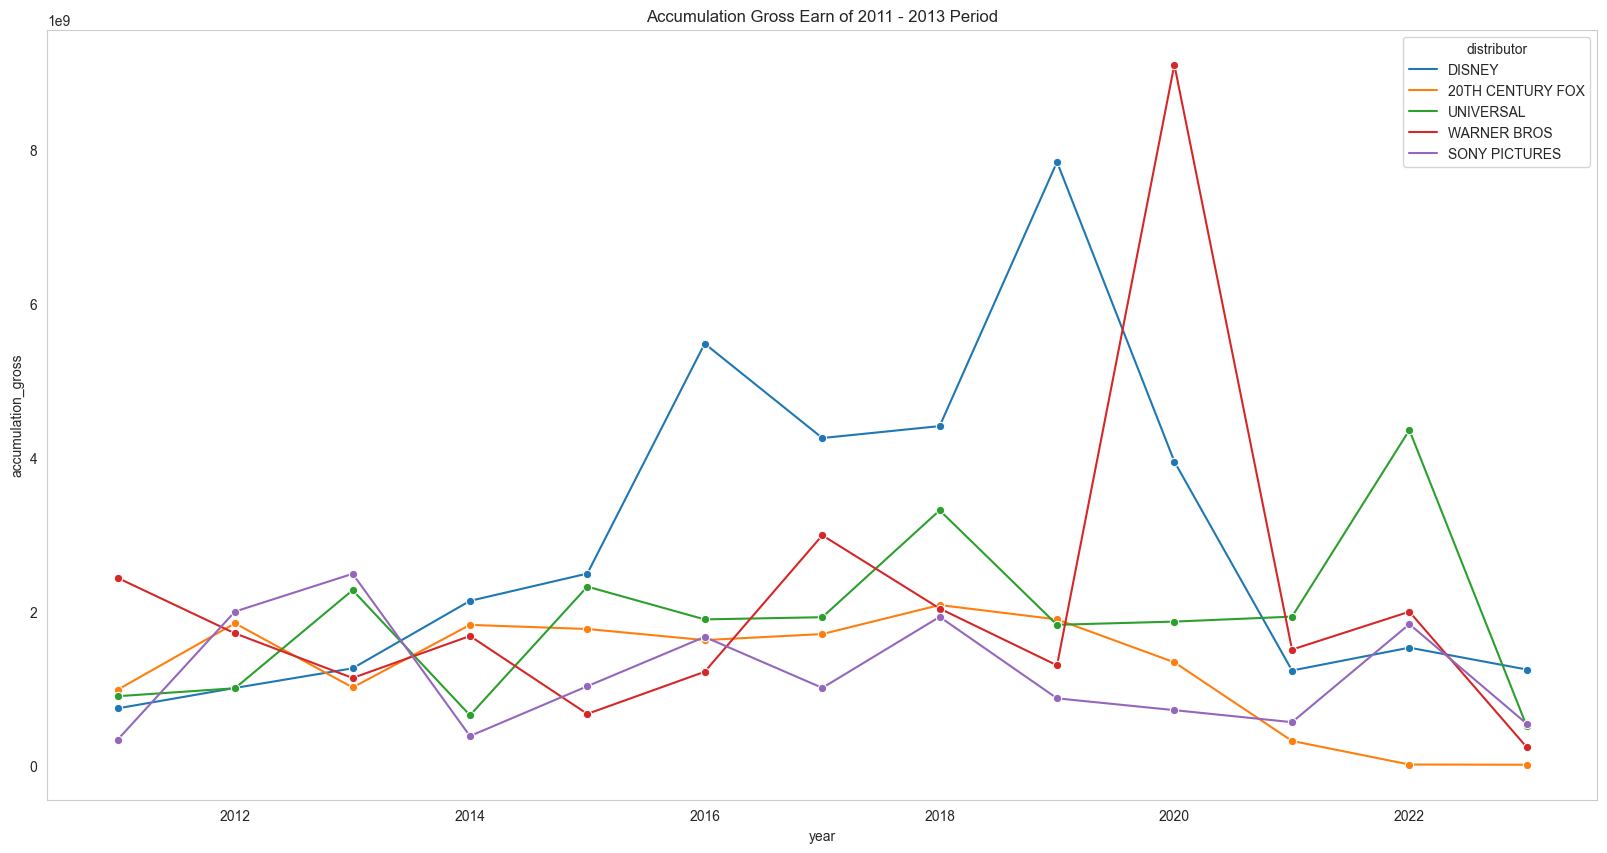

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(data=accumulation_gross_2011_now, x="year", y="accumulation_gross", color='skyblue', hue="distributor", hue_order=five_averages_distributors, marker="o").set(title='Accumulation Gross Earn of 2011 - 2013 Period')
plt.grid()
plt.show()

In [48]:
films_count_of_five_highest_share = films_five_highest_share.groupby([films_five_highest_share.year, films_five_highest_share.distributor]).agg(films_count= ('film' , 'count')).reset_index()
films_count_2011_now = films_count_of_five_highest_share.loc[films_count_of_five_highest_share['year'] > 2010].reset_index()
films_count_2011_now = films_count_2011_now.drop(columns=['index'])
films_count_2011_now["year"] = pd.to_datetime(films_count_2011_now["year"], format='%Y')
films_count_2011_now

,year,distributor,films_count
0,2011-01-01,20TH CENTURY FOX,33
1,2011-01-01,DISNEY,15
2,2011-01-01,SONY PICTURES,22
3,2011-01-01,UNIVERSAL,29
4,2011-01-01,WARNER BROS,25
...,...,...,...
60,2023-01-01,20TH CENTURY FOX,2
61,2023-01-01,DISNEY,10
62,2023-01-01,SONY PICTURES,11
63,2023-01-01,UNIVERSAL,20


In [49]:
dataframes = [films_count_2011_now, accumulation_gross_2011_now, films_list_2011_now, shares_of_five_biggest_avg]
from functools import reduce
analysis_needs = reduce(lambda  left,right: pd.merge(left,right,on=['year','distributor'],how='outer'), dataframes).fillna('none')
analysis_needs = analysis_needs[['year','distributor','marketShare','films_count','film','total_gross','accumulation_gross']]

dict = {"marketShare": "market_shares", 
        "film": "best_film", 
        "total_gross": "highest_gross_earns"}

analysis_needs = analysis_needs.rename(columns=dict)
analysis_needs['market_shares'] = analysis_needs['market_shares'].replace('none',np.NaN).astype('Int64')

In [50]:
disney = analysis_needs.loc[analysis_needs['distributor'] == 'DISNEY'].reset_index()
disney = disney.drop(columns=['index','distributor'])
disney

,year,market_shares,films_count,best_film,highest_gross_earns,accumulation_gross
0,2011-01-01,104250309,15,PIRATES OF THE CARIBBEAN: ON STRANGER TIDES,412583020,742199930
1,2012-01-01,118874699,14,MARVEL AVENGERS ASSEMBLE,430412032,1007604982
2,2013-01-01,172384710,17,WRECK-IT RALPH,306392624,1263146883
3,2014-01-01,105781643,15,FROZEN,566914563,2139995926
4,2015-01-01,237296387,13,THE AVENGERS: AGE OF ULTRON,756715062,2494776658
5,2016-01-01,292585179,13,STAR WARS: THE FORCE AWAKENS,2887977365,5484768006
6,2017-01-01,287090647,10,BEAUTY AND THE BEAST,1962623511,4257410070
7,2018-01-01,306978753,16,AVENGERS: INFINITY WAR,1184950464,4412406078
8,2019-01-01,484345454,20,AVENGERS: ENDGAME,1687797108,7846327985
9,2020-01-01,52794877,29,THE LION KING,835813700,3951254321


<Axes: >

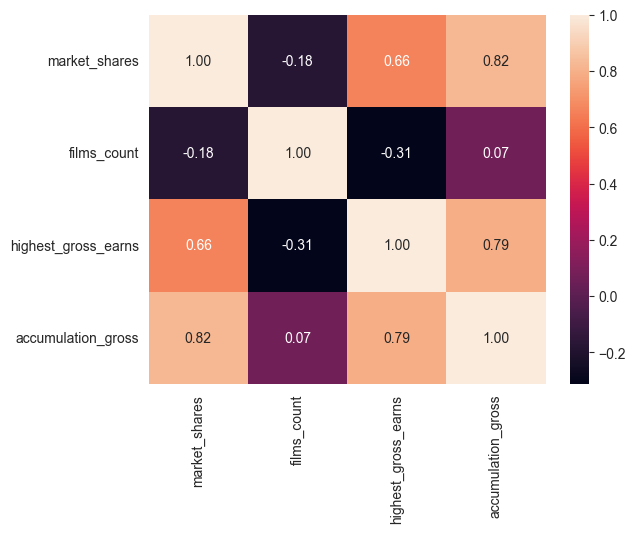

In [51]:
correlation = disney.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

Strong correlation : market_shares - accumulation gross (0.82), highest_gross_earns - accumulation_gross (0.79)
Moderate correlation : market_shares - highest_gross_earns

In [52]:
twenty_century_fox = analysis_needs.loc[analysis_needs['distributor'] == '20TH CENTURY FOX'].reset_index()
twenty_century_fox = twenty_century_fox.drop(columns=['index','distributor'])
twenty_century_fox

,year,market_shares,films_count,best_film,highest_gross_earns,accumulation_gross
0,2011-01-01,141459516,33,GULLIVER'S TRAVELS,165094647,984475918
1,2012-01-01,186988392,33,THE BEST EXOTIC MARIGOLD HOTEL,522923515,1848470174
2,2013-01-01,150636968,30,THE CROODS,337636568,1013940564
3,2014-01-01,243760318,37,DAWN OF THE PLANET OF THE APES,233579962,1827636247
4,2015-01-01,198069689,43,KINGSMAN: THE SECRET SERVICE,377217588,1774369513
5,2016-01-01,202322517,32,DEADPOOL,252301875,1629980246
6,2017-01-01,200557409,36,THE BOSS BABY,404172671,1708423094
7,2018-01-01,190414746,25,THE GREATEST SHOWMAN,685971024,2085795050
8,2019-01-01,69070223,25,BOHEMIAN RHAPSODY,1236282749,1899128952
9,2020-01-01,<NA>,13,BOHEMIAN RHAPSODY,827781550,1341176659


<Axes: >

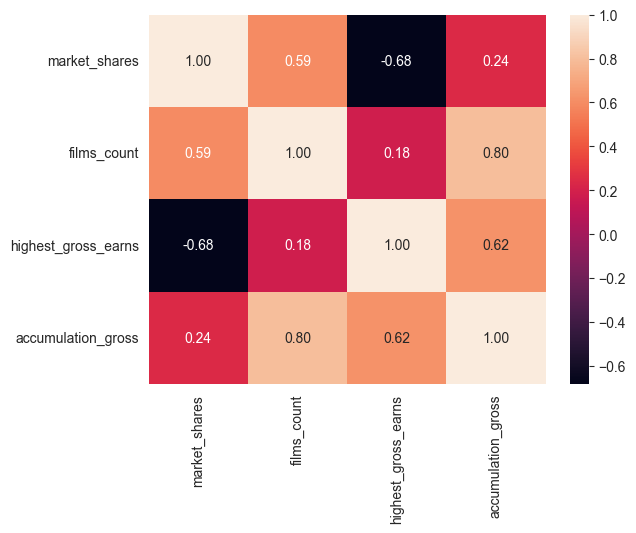

In [53]:
correlation = twenty_century_fox.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

Strong correlation : film_count - accumulation gross (0.80)
Moderate correlation : accumulation_gross - highest_gross_earns (0.62), market_shares - highest_gross_earns (-0.68)

In [54]:
universal = analysis_needs.loc[analysis_needs['distributor'] == 'UNIVERSAL'].reset_index()
universal = universal.drop(columns=['index','distributor'])
universal

,year,market_shares,films_count,best_film,highest_gross_earns,accumulation_gross
0,2011-01-01,130917732,29,JOHNNY ENGLISH REBORN,206367975,900121164
1,2012-01-01,123052586,31,JOHNNY ENGLISH REBORN,288937718,1004000535
2,2013-01-01,171966281,27,LES MISERABLES,913413870,2279315380
3,2014-01-01,130700828,27,MRS. BROWN'S BOYS D'MOVIE,155120317,652609075
4,2015-01-01,276081269,28,MINIONS,623065297,2325218634
5,2016-01-01,179084340,29,BRIDGET JONES'S BABY,613019231,1899140622
6,2017-01-01,207952714,27,DESPICABLE ME 3,664818479,1927674778
7,2018-01-01,260728595,32,MAMMA MIA: HERE WE GO AGAIN!,1408727147,3317286668
8,2019-01-01,179915306,37,DOWNTON ABBEY,392751850,1829112268
9,2020-01-01,38157581,34,MAMMA MIA!,412937672,1870443489


<Axes: >

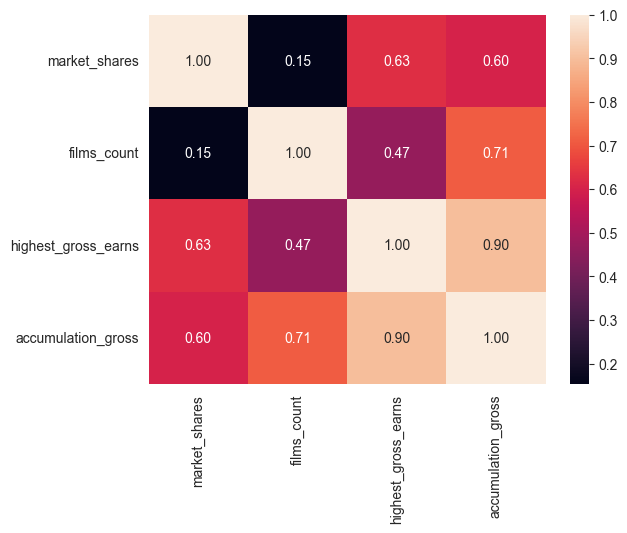

In [55]:
correlation = universal.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

In [56]:
warner_bros = analysis_needs.loc[analysis_needs['distributor'] == 'WARNER BROS'].reset_index()
warner_bros = warner_bros.drop(columns=['index','distributor'])
warner_bros

,year,market_shares,films_count,best_film,highest_gross_earns,accumulation_gross
0,2011-01-01,195042654,25,HARRY POTTER AND THE DEATHLY HALLOWS: PART 2,1120178741,2438996015
1,2012-01-01,151634157,25,THE DARK KNIGHT RISES,1074354534,1717406763
2,2013-01-01,185869157,23,THE HOBBIT: AN UNEXPECTED JOURNEY,298039941,1137282547
3,2014-01-01,164881399,31,GRAVITY,658799883,1683371911
4,2015-01-01,109516879,27,THE HOBBIT: THE BATTLE OF THE FIVE ARMIES,157182403,670432579
5,2016-01-01,192952908,34,FANTASTIC BEASTS AND WHERE TO FIND THEM,218181542,1217871104
6,2017-01-01,222861778,27,DUNKIRK,1120263755,2992692590
7,2018-01-01,188968791,29,DUNKIRK,794038815,2040392105
8,2019-01-01,157032119,34,JOKER,463968227,1301542909
9,2020-01-01,34177982,46,HARRY POTTER AND THE DEATHLY HALLOWS: PART 2,1241646570,9111136531


<Axes: >

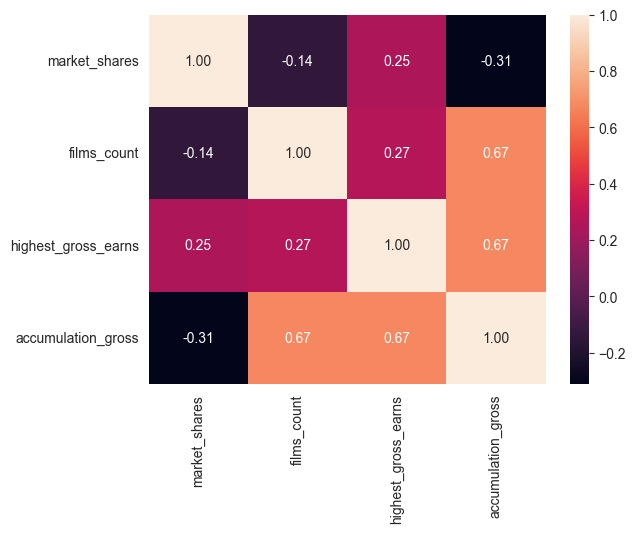

In [57]:
correlation = warner_bros.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")

In [58]:
sony_pictures = analysis_needs.loc[analysis_needs['distributor'] == 'SONY PICTURES'].reset_index()
sony_pictures = sony_pictures.drop(columns=['index','distributor'])
sony_pictures

,year,market_shares,films_count,best_film,highest_gross_earns,accumulation_gross
0,2011-01-01,72274376,22,THE SMURFS,148431228,334989722
1,2012-01-01,213749570,24,SKYFALL,805583944,2001163335
2,2013-01-01,98578630,20,SKYFALL,1950330400,2492085156
3,2014-01-01,65178945,22,THE AMAZING SPIDER-MAN 2,114403339,382322530
4,2015-01-01,148739507,19,SPECTRE,724460641,1030235774
5,2016-01-01,75651210,29,SPECTRE,1044715203,1671010435
6,2017-01-01,137070643,26,BABY DRIVER,193498044,1008605189
7,2018-01-01,135781231,23,PETER RABBIT,1171320009,1931973317
8,2019-01-01,111828684,22,SPIDER-MAN: FAR FROM HOME,528734534,872611102
9,2020-01-01,52571256,18,JUMANJI: THE NEXT LEVEL,302767898,719091171


<Axes: >

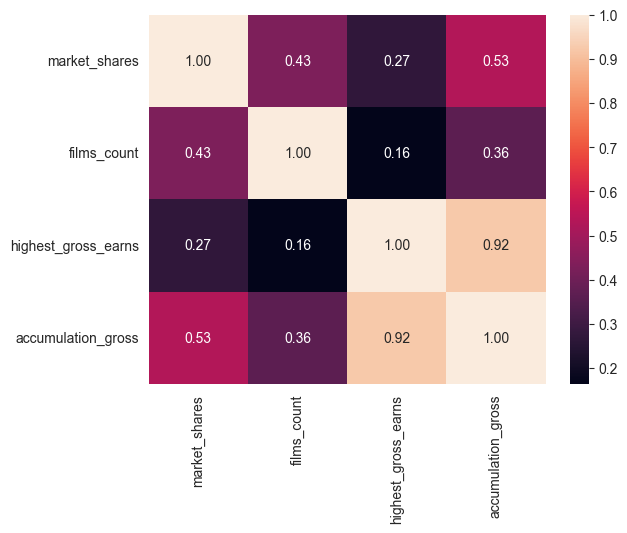

In [59]:
correlation = sony_pictures.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")